In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.spatial.distance as scdist
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score, silhouette_samples
import pandas as pd
import re

In [0]:
# reading csv file
data = pd.read_csv(r'/dbfs/mnt/cyberclinic/csv/data_fin.csv')
display(data)

index_id File_Arrival_Date appointment_id patient_id patient_age patient_gender patient_type appointment_date session_number returning_status previous_session successive_session practitioner_id practitioner_age practitioner_gender practitioner_experience fees social_wellbeing work_wellbeing goals_performance empathy_performance personal_wellbeing family_wellbeing confidence_performance primary_problem_area secondary_problem_area medicare_rebate audio_record_file_url 593113929 2021-09-17 127998322 1279 30 Ms. CONTRACT 2021-06-30 02:00:00 1 E 0 3 983 49 Female 7 0 1 0 4 4 1 1 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/e136a8c7-d2d6-46dc-8712-cd4780f17b7c.mp4 214031969 2021-09-17 127998329 1279 30 Ms. CONTRACT 2021-07-07 02:00:00 2 E 1 2 983 49 Female 7 0 1 0 3 4 1 1 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/a633ae24-d561-46e3-96e1-a8de2fa23e64.mp4 1113478469 2021-09-17 127998349 1279 30 Ms. CONTRACT 2021-07-14 02:00:00 3 E 2 1 983 49 Female 7 0 3 0 4 4 3 3 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/7a685e71-761b-40d3-b82c-83089e492ca5.mp4 53017151 2021-09-17 127998346 1279 30 Ms. CONTRACT 2021-08-04 03:00:00 4 E 3 0 983 49 Female 7 0 2 0 4 4 4 2 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/4a545df8-7ab7-43dd-8725-d83f34525721.mp4 1786700737 2021-09-17 123498332 1234 40 Ms. CONTRACT 2021-06-11 23:00:00 1 E 0 4 983 49 Female 7 0 3 1 4 4 1 3 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/92540bea-e0c9-40de-8c6e-22c4d383b46f.mp4 601920498 2021-09-17 123498315 1234 40 Ms. CONTRACT 2021-06-18 23:00:00 2 E 1 3 983 49 Female 7 0 3 3 4 4 3 3 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/57b52552-b5f7-44d2-a598-05e3c9c9a2dd.mp4 171625748 2021-09-17 123498350 1234 40 Ms. CONTRACT 2021-06-26 06:00:00 3 E 2 2 983 49 Female 7 0 3 0 4 4 3 4 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/ec21952e-3620-46f9-bd07-4fb3c337f758.mp4 822237702 2021-09-17 123498314 1234 40 Ms. CONTRACT 2021-07-09 23:00:00 4 E 3 1 983 49 Female 7 0 3 2 4 4 3 3 4 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/8d47d5d8-9885-47ba-9c62-68a347ba8f59.mp4 1643065428 2021-09-17 123498383 1234 40 Ms. CONTRACT 2021-08-05 01:00:00 5 E 4 0 983 49 Female 7 0 3 3 3 4 3 3 3 Recurring Panic Attacks Workplace Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/b642402c-b1e5-4964-af07-791acc02587a.mp4 542296655 2021-09-17 135698356 1356 49 Ms. CONTRACT 2021-07-24 00:00:00 1 E 0 2 983 49 Female 7 0 4 4 4 4 4 4 4 Couples Therapy Rehabilitation/Injury Counselling 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/e18e5a08-5c2b-44fd-a3af-d8fa0ace6918.mp4 353230447 2021-09-17 135698382 1356 49 Ms. CONTRACT 2021-07-28 07:00:00 2 E 1 1 983 49 Female 7 0 4 4 4 4 4 4 4 Couples Therapy Rehabilitation/Injury Counselling 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/4f88faba-a9eb-42b7-bae1-b53cd2d97349.mp4 390241776 2021-09-17 135698360 1356 49 Ms. CONTRACT 2021-08-05 00:00:00 3 E 2 0 983 49 Female 7 0 4 4 4 4 4 4 4 Couples Therapy Rehabilitation/Injury Counselling 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/a4a63660-a4ee-4474-9750-2744c0eb60e1.mp4 1106631548 2021-09-17 131711788 1317 20 Mr. CONTRACT 2021-07-19 00:00:00 1 E 0 5 117 47 Male 15 0 2 0 0 1 2 3 2 Performance Management Anxiety & Stress 0 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/32c5550d-2a48-4ff7-9d67-2fa1ab443970.mp4 849475688 2021-09-17 131793656 1317 20 Mr. CONTRACT 2021-08-05 03:00:00 2 E 1 4 936 48 Female 11 0 2 0 0 3 2 3 3 Performance Management Anxiety & Stress 0 https://s3-ap-southeast-1.amazonaws.com/cybe

In [0]:
# Create a view or table

temp_table_name = "train_data"

spark.createDataFrame(data).createOrReplaceTempView(temp_table_name)

In [0]:
# Merging transcipts with appointment table
df=spark.sql("""select fl.appointment_id, fl.patient_id, ts.Patient, ts.Practitioner, ((fl.social_wellbeing + fl.work_wellbeing + fl.goals_performance + fl.empathy_performance + fl.personal_wellbeing + fl.family_wellbeing + fl.confidence_performance)/7) TAS_WB_SCORE, ((fl.goals_performance + fl.empathy_performance + fl.confidence_performance)/3) TAS_SCORE, ((fl.social_wellbeing + fl.work_wellbeing + fl.personal_wellbeing + fl.family_wellbeing)/4) WB_SCORE, fl.social_wellbeing, fl.work_wellbeing, fl.goals_performance, fl.empathy_performance, fl.personal_wellbeing, fl.family_wellbeing, fl.confidence_performance, fl.returning_status, fl.previous_session, fl.successive_session
from train_data fl inner join cyb.transcript_main ts
on fl.index_id = ts.index_id
""")
data = df.toPandas()
display(data)

appointment_id patient_id Patient Practitioner TAS_WB_SCORE TAS_SCORE WB_SCORE social_wellbeing work_wellbeing goals_performance empathy_performance personal_wellbeing family_wellbeing confidence_performance returning_status previous_session successive_session 127998322 1279 Bye bye. null 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 I will. Thank you. Okay. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 Yeah, I'll try to. I like it. Enjoy it. Try and relax while you're lying there instead of thinking about all the things Cassandra said. This or or, you know, try and relax and enjoy it. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 No one else in the car. No trying to get nice. So you have to do that often, don't you? 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 I'm actually going to get a message oil. So, yeah, I'm going to do that this afternoon. I've done all the Errands this morning, so. Yeah. Wow. Lovely. You gonna get in the car and drive there on your own. No one else in the car. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 Great. Okay, Time's up. What are you doing for the rest of the day? You got stuck on. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 Yeah. Yeah. Okay. Well, I'll leave it with you for the next one, and then we'll start working a bit more on those goals next time. And when you're ready, bring in the stuff about the past. I might you need to be ready. I might ask and sort of introduce it. And if you're not ready to talk to, that's fine. So it's quite deal for you might need to get to know me a bit more and trust a bit more to be comfortable to talk about things, which is totally fine, but can still do work in the meantime. Okay. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 That could possibly work, too, because my daughter goes to bed at seven and most days like my husband times 637 o'clock. So that could work. It just depends on the day. Okay. But yeah, definitely. Have a look at your calendar and see what suits, because, yeah, I could probably do a few weeks where it will feel like it's weekly. And then it might be one time. I have to go fortnightly just because we've got a lot of appointments or whatever on it just completely depends. Week to week. That's okay. Yeah, I understand. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 Okay. I think open till 07:00. But if you wanted later, I could open that as well. Whatever works, I'll leave it with you. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 Yeah, that sounds good. And you can also. I don't know if you see my calendar yet, but we can have them after your children are in bed as well. Or whatever way. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 Does that make sense? Yeah, that makes sense. Homework and it's not. You have to go and write this down, but it's just say we're getting a routine up and we're talking about things that you might do in the next week or monitoring your mood or things like that that can help you in between sessions. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 It honestly depends on because I do Wednesday because my husband's off, so obviously he can be with the kids. It just depends on what I've got on my Wednesday, because being that he's off, that's when we cram everything in. So, for example, I feel like next Wednesday is quite busy, but the one that after is quite free, but in the winter as well. So it could vary. Pardon? I'll leave it with you to book when it works for you. Just if if it's going to be two or three weeks in between, I like to give you some sort of not homework, but suggestions on how about we tried. So then you're still doing something and you feel like you're getting somewhere in that time. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 127998322 1279 Not really. Like you sort of explained what the process would be. It's very much

In [0]:
%sql

select * from cyb.transcript_main where index_id = 814163288

index patient_id appointment_id Practitioner Patient index_id 1 1425 142598381 It'S not me. Do you know this is chat with you? I think. Have changed. Well, it's a good thing. I have an Arabic lessons on Wednesdays and Thursdays. Yeah, they have another Arabic record. Yeah. It's what we learned to say to do the Quran and Mars and the can you speak the language fluently or how are you? No, I can. I know the Alphabet. No pick on? No. Yes. Yeah. Still result. I don't have any paper. What exercise? Name it. Bob. Okay. Yes. I think. Yeah. Yes. What? So I draw my box. And see. I'm really bad at. The mom. Hello. Hello. Hi, Junior. How are you? Yeah, very good. Look, I'll leave you to it. I was just checking in to see he logged in. Okay. Also his mom said that she wanted to just have a quick chat with you so she might come after work. But if she does, I just wanted to give you the heads up. She might just want to come in and have a bit of a chat. Okay. Yeah, but she's not here yet, but that's what that might happen. But otherwise if you session by 530, she's not here. That's fine. You can finish off the session and then we organize another time. I mean she was here. What will happen is probably next week we might book another appointment and then they will be with her. So then she might go. Okay. 814163288

In [0]:
%sql

select * from cyb.silver_data where appointment_id = 142598381

index_id File_Arrival_Date appointment_id patient_id patient_age patient_gender patient_type appointment_date session_number returning_status previous_session successive_session practitioner_id practitioner_age practitioner_gender practitioner_experience fees social_wellbeing work_wellbeing goals_performance empathy_performance personal_wellbeing family_wellbeing confidence_performance primary_problem_area secondary_problem_area medicare_rebate audio_record_file_url model_trained 814163288 2021-09-17 142598381 1425 11 Mr. RETAIL 2021-08-19T06:30:00.000+0000 2 E 1 2 983 49 Female 7 190 4 0 2 4 1 4 4 88 https://s3-ap-southeast-1.amazonaws.com/cyberclinicbucket/3a37da4d-0a20-4e2e-a74d-c13d8dfec9b6.mp4 false

In [0]:
turns_df = data.groupby(['appointment_id']).size().reset_index(name='turn_counts').sort_values('turn_counts', ascending=False)
display(turns_df)

appointment_id turn_counts 125710152 178 124998313 172 15041011580 159 141510068 156 133298324 152 129310118 151 123294012 150 129098374 149 133393678 147 142310063 146 123294020 138 115793642 135 116294088 135 134098310 128 122298366 126 122011711 125 139910115 124 131711788 121 139598340 118 133298354 118 131793646 118 13179364178 116 134098315 116 145211752 115 142310067 115 14231006319 115 132598339 108 118093652 108 135793689 108 133393611 107 15071011805 107 135698382 105 118694052 104 134810112 103 141611747 102 118694059 101 131793656 100 133897369 98 144598376 96 133897314 95 145193655 94 14519361757 93 14751176350 92 132497338 92 140411715 92 115498321 91 13389736585 91 119496650 91 11809363753 91 134810118 90 143295522 90 124998319 90 15069557633 90 135594031 89 14329555937 88 143295585 88 115194018 87 118694024 86 131793617 85 132994060 85 140411745 85 133897351 83 132598341 83 127998329 83 127998322 79 136611782 78 123498332 78 122011748 77 133897311 77 141611723 76 115194021 76 118093633 76 12981011336 76 127295037 75 127998349 75 115498311 75 122298367 74 123498350 74 119496643 74 122298340 73 123498315 72 129810115 72 116294042 71 145211786 70 136611787 70 118093644 69 14791176157 67 129810117 66 14791173974 65 127295063 65 135793679 64 132994040 63 138098368 63 13661178428 63 133897326 63 136611728 63 12729508444 60 136611768 59 138098310 56 130511740 56 858117643 55 135698360 52 131793626 51 141698313 51 125610178 51 125795237 51 123498383 48 115793667 47 14791175889 45 126596666 45 118694094 42 115793664 36 115498385 35 15001006442 33 127998346 27 115498367 25 115498345 24 119496613 17 13661175987 16 124998326 13 133598314 10 132994046 9 12981011788 6 136197354 6 125698367 6 122298384 5 11549837266 4 118694043 3 133198360 3 142598382 3 142598344 2 142598381 1

In [0]:
# Distribution of turns accross sessions
turns_df['turn_counts'].describe()

Out[9]: count 132.000000
mean 78.984848
std 40.059114
min 1.000000
25% 56.000000
50% 78.000000
75% 103.250000
max 178.000000
Name: turn_counts, dtype: float64

In [0]:
# Calculating Maximum and minimum number of clusters
max_clusters = turns_df['turn_counts'].max()
min_clusters = turns_df['turn_counts'].min()
print('max_clusters: ' + str(max_clusters) + ' | min_clusters: ' + str(min_clusters))

max_clusters: 178 | min_clusters: 1

# Visualizations

Out[11]:

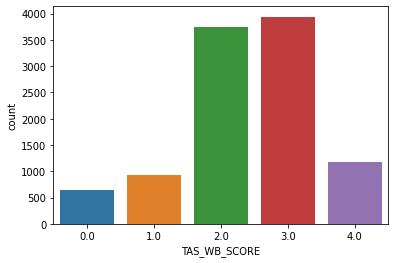

<matplotlib.axes._subplots.AxesSubplot at 0x7f729ecb02e0>

In [0]:
# TAS_WB_SCORE distribution across turns
import seaborn as sns
sns.countplot(round(data.TAS_WB_SCORE))

Out[12]:

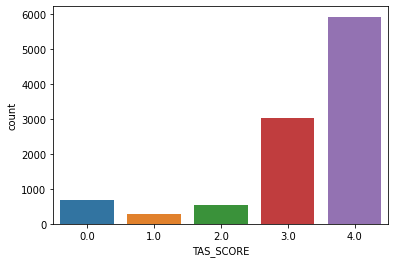

<matplotlib.axes._subplots.AxesSubplot at 0x7f729ccd4a00>

In [0]:
# TAS_SCORE distribution across turns
sns.countplot(round(data.TAS_SCORE))

Out[13]:

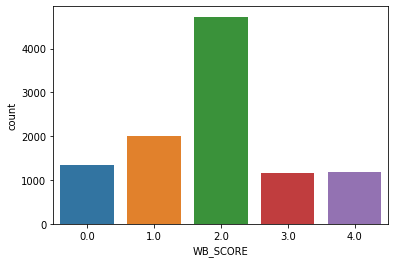

<matplotlib.axes._subplots.AxesSubplot at 0x7f729c5f04f0>

In [0]:
# WB_SCORE distribution across turns
import seaborn as sns
sns.countplot(round(data.WB_SCORE))

In [0]:
display(data[['social_wellbeing', 'work_wellbeing', 'personal_wellbeing', 'family_wellbeing']].apply(pd.Series.value_counts))

social_wellbeing work_wellbeing personal_wellbeing family_wellbeing 1937 3937 1530 1269 1999 1738 2584 1887 3111 1828 3087 2638 1962 1847 1982 2701 1417 1076 1243 1931

In [0]:
display(data[['goals_performance', 'empathy_performance', 'confidence_performance']].apply(pd.Series.value_counts))

goals_performance empathy_performance confidence_performance 4925 6962 6987 2598 1873 2200 1174 690 690 1079 626 395 650 275 154

In [0]:
%sh 
pip install nltk
pip install --upgrade pip
python -m nltk.downloader all
pip install contractions
pip install -U gensim --no-cache-dir --no-binary :all: 
pip install textblob
pip install inflect

Requirement already satisfied: nltk in /databricks/python3/lib/python3.8/site-packages (3.6.5)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.8/site-packages (from nltk) (4.62.3)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk) (8.0.3)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
Requirement already satisfied: regex>=2021.8.3 in /databricks/python3/lib/python3.8/site-packages (from nltk) (2021.11.2)
WARNING: You are using pip version 20.2.4; however, version 21.3.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
Collecting pip
 Downloading pip-21.3.1-py3-none-any.whl (1.7 MB)
Installing collected packages: pip
 Attempting uninstall: pip
 Found existing installation: pip 20.2.4
 Uninstalling pip-20.2.4:
 Successfully uninstalled pip-20.2.4
Successfully installed pip-21.3.1
/usr/local/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
 warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Package abc is already up-to-date!
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Package alpino is already up-to-date!
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package biocreative_ppi is already up-to-date!
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Package brown is already up-to-date!
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Package brown_tei is already up-to-date!
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Package cess_cat is already up-to-date!
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Package cess_esp is already up-to-date!
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Package chat80 is already up-to-date!
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package city_database is already up-to-date!
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package comparative_sentences is already up-to-
[nltk_data] | date!
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Package comtrans is already up-to-date!
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Package conll2000 is already up-to-date!
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Package conll2002 is already up-to-date!
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Package conll2007 is already up-to-date!
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Package crubadan is already up-to-date!
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package dependency_treebank is already up-to-date!
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Package dolch is already up-to-date!
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package europarl_raw is already up-to-date!
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Package floresta is already up-to-date!
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v15 is already up-to-date!
[nltk_data] | Downloading package framenet_

In [0]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import contractions
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
#from spellchecker import SpellChecker
from textblob import TextBlob
import re
import inflect

def get_wordnet_pos(tag):    
    if tag.startswith('J'):        
        return wordnet.ADJ    
    elif tag.startswith('V'):        
        return wordnet.VERB    
    elif tag.startswith('N'):        
        return wordnet.NOUN    
    elif tag.startswith('R'):        
        return wordnet.ADV    
    else:        
        return wordnet.NOUN

def CleanString(convText):
    #Expanding Contractions
    # creating an empty list 
    expanded_words = []     
    for word in convText.split(): 
      # using contractions.fix to expand the shotened words 
      expanded_words.append(contractions.fix(word))
    #expanded_words

    expanded_text = ' '.join(expanded_words)
    expanded_words = word_tokenize(expanded_text)
    #expanded_words

    #Converting all Characters to Lowercase
    lower_words = []
    for word in expanded_words:
        lower_words.append(word.lower())    
    #lower_words

    #Removing Punctuations
    non_punc_words = []
    punc = string.punctuation
    for word in lower_words:
        if word not in punc:
            non_punc_words.append(word)
    #non_punc_words

    #Removing Stopwords
    non_stop_words = []
    stop_words = set(stopwords.words('english'))
    for word in non_punc_words: 
        if word not in stop_words:
            non_stop_words.append(word)
    non_stop_words

    #Applying POS TAG
    #test = list(filter(lambda x: nltk.tag.pos_tag(x), non_stop_words))
    pos_tag = nltk.tag.pos_tag(non_stop_words)
    #pos_tag

    pos_tag = list(filter(lambda x: ((word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x), pos_tag))
    #pos_tag

    #Lemmatization
    wnl = WordNetLemmatizer()
    lemmatisedNonSPK = list(filter(lambda x: (wnl.lemmatize(word) for word in x), non_stop_words))
    #lemmatisedNonSPK
    #len(expanded_words)
    #len(lemmatisedNonSPK)

    # digits to words
    p = inflect.engine()
    lemmatisedNonSPK = re.sub(r'(?<!\S)\d+(?!\S)', lambda x: p.number_to_words(x.group()), lemmatisedNonSPK)

    return lemmatisedNonSPK
  
def cleanStrCol(column):
  #Expanding Contractions
  op_col = column.apply(lambda x: [contractions.fix(word) for word in x.split()])
  
  op_col = op_col.apply(lambda x: ' '.join(x))
  op_col = op_col.apply(lambda x: word_tokenize(x))

  #Converting all Characters to Lowercase
  op_col = op_col.apply(lambda x: [word.lower() for word in x])

  #Removing Punctuations
  punc = string.punctuation
  op_col = op_col.apply(lambda x: [word for word in x if word not in punc])
  
  #Spell Check
  op_col = op_col.apply(lambda x: [str(TextBlob(word).correct()) for word in x])

  #Removing Stopwords
  stop_words = set(stopwords.words('english'))
  op_col = op_col.apply(lambda x: [word for word in x if word not in stop_words])

  #Applying POS TAG
  op_col = op_col.apply(nltk.tag.pos_tag)

  op_col = op_col.apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

  #Lemmatization
  wnl = WordNetLemmatizer()
  op_col = op_col.apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
  
  return op_col

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!

In [0]:
# Spell Check Practitioner
data['Practitioner'] = data['Practitioner'].apply(lambda x: str(TextBlob(x).correct()) if type(x) == 'str' else x)

In [0]:
data['Cleaned_Patient_TS'] = cleanStrCol(data['Patient'])
data['Cleaned_Patient_TS_STR'] = data['Cleaned_Patient_TS'].apply(lambda x: ' '.join(x))
display(data)

appointment_id patient_id Patient Practitioner TAS_WB_SCORE TAS_SCORE WB_SCORE social_wellbeing work_wellbeing goals_performance empathy_performance personal_wellbeing family_wellbeing confidence_performance returning_status previous_session successive_session Cleaned_Patient_TS Cleaned_Patient_TS_STR 127998322 1279 Bye bye. null 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(bye, bye) bye bye 127998322 1279 I will. Thank you. Okay. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List() 127998322 1279 Yeah, I'll try to. I like it. Enjoy it. Try and relax while you're lying there instead of thinking about all the things Cassandra said. This or or, you know, try and relax and enjoy it. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(yeah, try) yeah try 127998322 1279 No one else in the car. No trying to get nice. So you have to do that often, don't you? 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(one, else, car, try, get, nice) one else car try get nice 127998322 1279 I'm actually going to get a message oil. So, yeah, I'm going to do that this afternoon. I've done all the Errands this morning, so. Yeah. Wow. Lovely. You gonna get in the car and drive there on your own. No one else in the car. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(actually, go, get, message, oil, yeah, go, afternoon, do, errands, morning) actually go get message oil yeah go afternoon do errands morning 127998322 1279 Great. Okay, Time's up. What are you doing for the rest of the day? You got stuck on. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(great) great 127998322 1279 Yeah. Yeah. Okay. Well, I'll leave it with you for the next one, and then we'll start working a bit more on those goals next time. And when you're ready, bring in the stuff about the past. I might you need to be ready. I might ask and sort of introduce it. And if you're not ready to talk to, that's fine. So it's quite deal for you might need to get to know me a bit more and trust a bit more to be comfortable to talk about things, which is totally fine, but can still do work in the meantime. Okay. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(yeah, yeah) yeah yeah 127998322 1279 That could possibly work, too, because my daughter goes to bed at seven and most days like my husband times 637 o'clock. So that could work. It just depends on the day. Okay. But yeah, definitely. Have a look at your calendar and see what suits, because, yeah, I could probably do a few weeks where it will feel like it's weekly. And then it might be one time. I have to go fortnightly just because we've got a lot of appointments or whatever on it just completely depends. Week to week. That's okay. Yeah, I understand. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(could, possibly, work, daughter, go, bed, seven, day, like, husband, time, 637, clock, could, work, depends, day, okay, yeah, definitely, look, calendar, see, suit, yeah, could, probably, week, feel, like, weekly, might, one, time, go, fortnightly, get, lot, appointment, whatever, completely, depend, week, week) could possibly work daughter go bed seven day like husband time 637 clock could work depends day okay yeah definitely look calendar see suit yeah could probably week feel like weekly might one time go fortnightly get lot appointment whatever completely depend week week 127998322 1279 Okay. I think open till 07:00. But if you wanted later, I could open that as well. Whatever works, I'll leave it with you. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(okay) okay 127998322 1279 Yeah, that sounds good. And you can also. I don't know if you see my calendar yet, but we can have them after your children are in bed as well. Or whatever way. 2.142857142857143 4.0 0.75 1 0 4 4 1 1 4 E 0 3 List(yeah, sound, good) yeah sound good 127998322 1279 Does that make sense? Yeah, that makes sense. Homework and it's not. You have to go and write this down, but it's just say we're getting a routine up and we're talking about

In [0]:
# Dumping Pre-Processed data
data.to_csv(r'/dbfs/mnt/cyberclinic/csv/data.csv', index=False)

### Creating Combined turns columns

In [0]:
# Create a view or table

temp_table_name = "model_data"

spark.createDataFrame(data).createOrReplaceTempView(temp_table_name)

In [0]:
app_log=spark.sql("""select t.* , 
concat_ws('. ',collect_list(Cleaned_Patient_TS_STR) over (partition by appointment_id order by appointment_id ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW))context_patient from model_data t""")
data = app_log.toPandas()
display(data)

appointment_id patient_id Patient Practitioner TAS_WB_SCORE TAS_SCORE WB_SCORE social_wellbeing work_wellbeing goals_performance empathy_performance personal_wellbeing family_wellbeing confidence_performance returning_status previous_session successive_session Cleaned_Patient_TS Cleaned_Patient_TS_STR context_patient 115498321 1154 Thank you. You're welcome. Alright, see you later. Bye bye. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(thank) thank thank 115498321 1154 Yeah. Sounds really nice. She Cook it like a cake for everyone or something something fun. Okay, we'll take care, and I'll talk to you soon. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah) yeah thank. yeah 115498321 1154 Pardon? You in holiday mode again. He had four school and the good luck sounds good. Okay, well, we can leave it there if you like. And you can go Cook your eggs. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(pardon) pardon thank. yeah. pardon 115498321 1154 Not really. Mode again. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(really) really thank. yeah. pardon. really 115498321 1154 Yeah. What's wrong? Sometimes that can be a good thing because you're tricking your brain. Because if you're having those low thoughts about not wanting to be here and a bit of suicidal ideation, then if you're pretending that everything's okay and you're happy, well then you're actually lifting your own mood. You're tricking your brain, aren't you? Yeah, I think it's good. So are there no other issues? 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah, wrong) yeah wrong thank. yeah. pardon. really. yeah wrong 115498321 1154 Yeah. And hopefully with that bully girl gone, you know, hopefully things will be a bit com for you. More normal. Yeah. Alright. Well, I was saying that she thinks that, you know, you move sort of picking up and she says little bits and pieces that are making her happy. So that's good. That makes me happy. Make you happy. It's not annoying you. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah) yeah thank. yeah. pardon. really. yeah wrong. yeah 115498321 1154 Yeah. And Friday is where we're actually playing with an instrument. I'm just not really sure which one. Cool. You're doing lots of good things at school. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah, friday, actually, play, instrument, really, sure, one) yeah friday actually play instrument really sure one thank. yeah. pardon. really. yeah wrong. yeah. yeah friday actually play instrument really sure one 115498321 1154 I'm pressure music was Monday and Friday. And then I get it on Friday. We've got lots of reasons to go back. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(pressure, music, monday, friday, get, friday) pressure music monday friday get friday thank. yeah. pardon. really. yeah wrong. yeah. yeah friday actually play instrument really sure one. pressure music monday friday get friday 115498321 1154 Yeah, because. Tech. And we're cooking. This. You got to go back to school. And when his music back on Wednesday as well. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah) yeah thank. yeah. pardon. really. yeah wrong. yeah. yeah friday actually play instrument really sure one. pressure music monday friday get friday. yeah 115498321 1154 Yeah. So I just bring my lap. And. And now I can't get any of the books. Well, hopefully you can go back to school on Wednesday. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah, bring, lap, get, book) yeah bring lap get book thank. yeah. pardon. really. yeah wrong. yeah. yeah friday actually play instrument really sure one. pressure music monday friday get friday. yeah. yeah bring lap get book 115498321 1154 Because if the lock down on me. Three days of school. Yeah. Yeah. She was saying that you left a lot of your books and stuff

In [0]:
# dump clean data
data.to_csv(r'/dbfs/mnt/cyberclinic/csv/data_fin_cleaned.csv', index=False)

### Summarize Patient Response

In [0]:
import re
import inflect              
import heapq

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
#import contractions
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
#from spellchecker import SpellChecker
#from textblob import TextBlob

def summarize_text(article_text):
  # Removing Square Brackets and Extra Spaces
  article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
  article_text = re.sub(r'\s+', ' ', article_text)
  
  # Removing special characters and digits
  formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
  formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)
  
  sentence_list = nltk.sent_tokenize(article_text)
  
  if(len(sentence_list) < 6):
    return article_text
  
  stopwords = nltk.corpus.stopwords.words('english')

  word_frequencies = {}
  for word in nltk.word_tokenize(formatted_article_text):
      if word not in stopwords:
          if word not in word_frequencies.keys():
              word_frequencies[word] = 1
          else:
              word_frequencies[word] += 1

  maximum_frequncy = max(word_frequencies.values())

  for word in word_frequencies.keys():
      word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
      
  sentence_scores = {}
  for sent in sentence_list:
      for word in nltk.word_tokenize(sent.lower()):
          if word in word_frequencies.keys():
              if len(sent.split(' ')) < 30:
                  if sent not in sentence_scores.keys():
                      sentence_scores[sent] = word_frequencies[word]
                  else:
                      sentence_scores[sent] += word_frequencies[word]
    
  summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)

  summary = ' '.join(summary_sentences)
  return summary

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!

In [0]:
# rename Practitioner to Practitioner_orig
data = data.rename(columns={"Practitioner": "Practitioner_orig"})

In [0]:
# Check for Nulls
if (data['Practitioner_orig'].isnull().sum() > 0):
  for i in range(len(data)):
    if(type(data['Practitioner_orig'][i]) != str):
      data['Practitioner_orig'][i] = ''

<command-2587983808625269>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 data['Practitioner_orig'][i] = ''

In [0]:
# Summarizing Practitioner's Transcripts
data['Practitioner']=data[data['Practitioner_orig'] != '']['Practitioner_orig'].apply(lambda x: summarize_text(x))
display(data[['Practitioner_orig', 'Practitioner']])

Practitioner_orig Practitioner You're welcome. Alright, see you later. Bye bye. You're welcome. Alright, see you later. Bye bye. Sounds really nice. She Cook it like a cake for everyone or something something fun. Okay, we'll take care, and I'll talk to you soon. Sounds really nice. She Cook it like a cake for everyone or something something fun. Okay, we'll take care, and I'll talk to you soon. You in holiday mode again. He had four school and the good luck sounds good. Okay, well, we can leave it there if you like. And you can go Cook your eggs. You in holiday mode again. He had four school and the good luck sounds good. Okay, well, we can leave it there if you like. And you can go Cook your eggs. Mode again. Mode again. Sometimes that can be a good thing because you're tricking your brain. Because if you're having those low thoughts about not wanting to be here and a bit of suicidal ideation, then if you're pretending that everything's okay and you're happy, well then you're actually lifting your own mood. You're tricking your brain, aren't you? Yeah, I think it's good. So are there no other issues? Sometimes that can be a good thing because you're tricking your brain. Because if you're having those low thoughts about not wanting to be here and a bit of suicidal ideation, then if you're pretending that everything's okay and you're happy, well then you're actually lifting your own mood. You're tricking your brain, aren't you? Yeah, I think it's good. So are there no other issues? And hopefully with that bully girl gone, you know, hopefully things will be a bit com for you. More normal. Yeah. Alright. Well, I was saying that she thinks that, you know, you move sort of picking up and she says little bits and pieces that are making her happy. So that's good. That makes me happy. Make you happy. It's not annoying you. Well, I was saying that she thinks that, you know, you move sort of picking up and she says little bits and pieces that are making her happy. And hopefully with that bully girl gone, you know, hopefully things will be a bit com for you. That makes me happy. Make you happy. More normal. Cool. You're doing lots of good things at school. Cool. You're doing lots of good things at school. We've got lots of reasons to go back. We've got lots of reasons to go back. Tech. And we're cooking. This. You got to go back to school. And when his music back on Wednesday as well. Tech. And we're cooking. This. You got to go back to school. And when his music back on Wednesday as well. Well, hopefully you can go back to school on Wednesday. Well, hopefully you can go back to school on Wednesday. Yeah. Yeah. She was saying that you left a lot of your books and stuff at school because you were told, like at the end of the day and then they locked it down. So I guess a lot of kids would have been in that situation. Yeah. Yeah. She was saying that you left a lot of your books and stuff at school because you were told, like at the end of the day and then they locked it down. So I guess a lot of kids would have been in that situation. What are you going to do if you got plans? You're just going to relax. Yeah. What are you going to do if you got plans? You're just going to relax. Yeah. Not okay. So you still got Monday and Tuesday off school because of the covert the lock down. Is that right? Not okay. So you still got Monday and Tuesday off school because of the covert the lock down. Is that right? Did you? Yeah. Yeah. Have you still got it? You check the bad ages again? Did you? Yeah. Yeah. Have you still got it? You check the bad ages again? Okay. Okay. Is it real? Is it real? Oh, that's cool. Oh, that's cool. It's nice. It's nice. That's a good choice of color. So have you got new paintings you're hanging up, or are they the old one that you had before? That's a good choice of color. So have you got new paintings you're hanging up, or are they the old one that you had before? It looks very nice. Like, from that angle, like the white r

In [0]:
# dump clean summarized data
data.to_csv(r'/dbfs/mnt/cyberclinic/csv/data_fin_cleaned_summarized.csv', index=False)

In [0]:
for index, stmts in data['context_patient'].items():
  lines = stmts.split(sep='. ')
  data.loc[index, 'context_patient'] = (summarize_text('. '.join(lines[:-1])) + ' ' + lines[-1]).replace('.','')

display(data)

appointment_id patient_id Patient Practitioner_orig TAS_WB_SCORE TAS_SCORE WB_SCORE social_wellbeing work_wellbeing goals_performance empathy_performance personal_wellbeing family_wellbeing confidence_performance returning_status previous_session successive_session Cleaned_Patient_TS Cleaned_Patient_TS_STR context_patient Practitioner 115498321 1154 Thank you. You're welcome. Alright, see you later. Bye bye. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(thank) thank thank You're welcome. Alright, see you later. Bye bye. 115498321 1154 Yeah. Sounds really nice. She Cook it like a cake for everyone or something something fun. Okay, we'll take care, and I'll talk to you soon. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah) yeah thank yeah Sounds really nice. She Cook it like a cake for everyone or something something fun. Okay, we'll take care, and I'll talk to you soon. 115498321 1154 Pardon? You in holiday mode again. He had four school and the good luck sounds good. Okay, well, we can leave it there if you like. And you can go Cook your eggs. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(pardon) pardon thank yeah pardon You in holiday mode again. He had four school and the good luck sounds good. Okay, well, we can leave it there if you like. And you can go Cook your eggs. 115498321 1154 Not really. Mode again. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(really) really thank yeah pardon really Mode again. 115498321 1154 Yeah. What's wrong? Sometimes that can be a good thing because you're tricking your brain. Because if you're having those low thoughts about not wanting to be here and a bit of suicidal ideation, then if you're pretending that everything's okay and you're happy, well then you're actually lifting your own mood. You're tricking your brain, aren't you? Yeah, I think it's good. So are there no other issues? 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah, wrong) yeah wrong thank yeah pardon really yeah wrong Sometimes that can be a good thing because you're tricking your brain. Because if you're having those low thoughts about not wanting to be here and a bit of suicidal ideation, then if you're pretending that everything's okay and you're happy, well then you're actually lifting your own mood. You're tricking your brain, aren't you? Yeah, I think it's good. So are there no other issues? 115498321 1154 Yeah. And hopefully with that bully girl gone, you know, hopefully things will be a bit com for you. More normal. Yeah. Alright. Well, I was saying that she thinks that, you know, you move sort of picking up and she says little bits and pieces that are making her happy. So that's good. That makes me happy. Make you happy. It's not annoying you. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah) yeah thank yeah pardon really yeah wrong yeah Well, I was saying that she thinks that, you know, you move sort of picking up and she says little bits and pieces that are making her happy. And hopefully with that bully girl gone, you know, hopefully things will be a bit com for you. That makes me happy. Make you happy. More normal. 115498321 1154 Yeah. And Friday is where we're actually playing with an instrument. I'm just not really sure which one. Cool. You're doing lots of good things at school. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah, friday, actually, play, instrument, really, sure, one) yeah friday actually play instrument really sure one yeah wrong yeah yeah thank pardon yeah friday actually play instrument really sure one Cool. You're doing lots of good things at school. 115498321 1154 I'm pressure music was Monday and Friday. And then I get it on Friday. We've got lots of reasons to go back. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(pressure, music, monday, friday, get, friday) pressure music monday friday get friday yeah friday a

In [0]:
# merging Cleaned_Patient_TS_STR 
df1 = data.drop(['Cleaned_Patient_TS_STR'], axis = 1)
df2 = data.drop(['context_patient'], axis = 1)
df2 = df2.rename(columns = {'Cleaned_Patient_TS_STR': 'context_patient'}, inplace = False)
df1 = df1.append(df2, ignore_index = True)

In [0]:
# Check for Nulls in context_patient
if(df1['context_patient'].isnull().sum() > 0):
  for i in range(len(df1)):
    if(type(df1['context_patient'][i]) != str):
      if(type(df1['Patient'][i]) == str):
        df1['context_patient'][i] = df1['Patient'][i]
      else:
        df1['context_patient'][i] = ''

In [0]:
# Unpickle the tfidf SKIP

import pickle
tfidf = pickle.load(open("/dbfs/mnt/cyberclinic/models/tfidf.pickle", "rb"))

In [0]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df1['context_patient'].values)
tfidf.shape

Out[33]: (20852, 6510)

In [0]:
# writing tfidf to adls
import pickle
pickle.dump(tfidf, open("/dbfs/mnt/cyberclinic/models/tfidf.pickle", "wb"))

In [0]:
#kos W/5 -> 91%
n_components = round(tfidf.shape[1]/5)

svd = TruncatedSVD(n_components)
# tfidf results are normalized. Since LSA/SVD results are
# not normalized, we have to redo the normalization:
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

%time \
tfidf_lsa = lsa.fit_transform(tfidf)

print("Explained variance of the SVD step: {}%".format(int(svd.explained_variance_ratio_.sum() * 100)))

#LSA (n_components = W/5 explaining 93% of the original variance)
#reduces the size of the DTM from shape (20852, 6508) to (20852, 1302)

CPU times: user 1min 22s, sys: 51.3 s, total: 2min 14s
Wall time: 24.3 s
Explained variance of the SVD step: 90%

Out[36]:

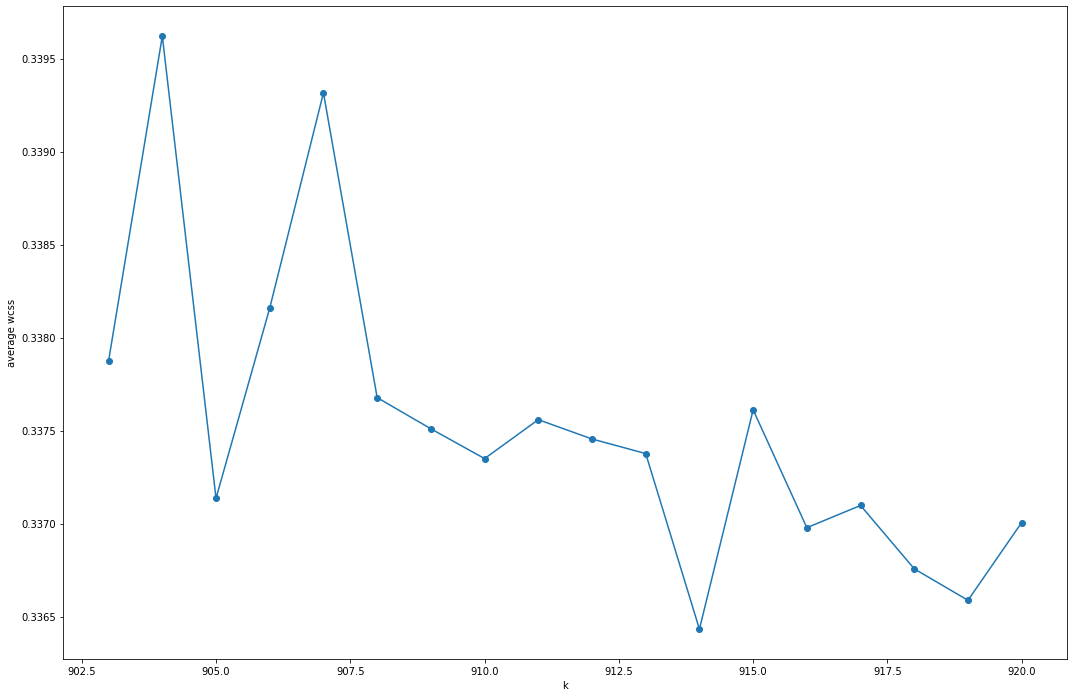

Text(0.5, 0, 'k')

In [0]:
# Try to find optimal number of clusters for k-means. “Elbow” method
k_range = range(903,921)
kms = [KMeans(n_clusters=k, init='k-means++').fit(tfidf_lsa) for k in k_range]
centroids = [X.cluster_centers_ for X in kms]
labels = [km.labels_ for km in kms]
#calculate Euclidean distance from each point to cluster center
k_euclid = [scdist.cdist(tfidf_lsa, c, 'euclidean') for c in centroids] 
dist = [np.min(ke, axis=1) for ke in k_euclid]
#Total within cluster sum of squares
wcss = [sum(d**2) for d in dist]
#average wcss
avwcss = [(sum(d**2))/len(d) for d in dist]
#total sum of squares
tss = sum(scdist.pdist(tfidf_lsa)**2)/tfidf_lsa.shape[0]
#between cluster sum of squares:
bss = tss - wcss
#plot average wcss vs number of clusters "Elbow plot": look for a point where the rate of decrease in wcss sharply shifts
plt.subplots(figsize=(18, 12)) # set size
plt.plot(k_range, avwcss, '-o')
plt.ylabel("average wcss")
plt.xlabel("k")

In [0]:
# Check out the Silhouette scores
silhouette_avg_scores = [silhouette_score(tfidf_lsa, l) for l in labels]
print(silhouette_avg_scores)

[0.28032013501790987, 0.27714611662273314, 0.27742961619803713, 0.2740699536999216, 0.27465369176668786, 0.2730442771535815, 0.27471397678352133, 0.27655453949320186, 0.27384416508844817, 0.2775484553521978, 0.2769872933703997, 0.27947170286958306, 0.2775472439118851, 0.2735356807612203, 0.2766996190963684, 0.275539066782401, 0.2767983668517079, 0.27597420054069827]

In [0]:
k = silhouette_avg_scores.index(max(silhouette_avg_scores)) + 903
#these are all default options (except for k)
km = KMeans(algorithm='auto',
            copy_x=True,
            init='k-means++',
            max_iter=300,
            n_clusters=k,
            n_init=10,
            n_jobs=1,
            precompute_distances='auto',
            random_state=None,
            tol=0.0001,
            verbose=0)

In [0]:
%time km.fit(tfidf_lsa)

/databricks/python/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:932: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
 warnings.warn("'precompute_distances' was deprecated in version "
/databricks/python/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
 warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
CPU times: user 45min 7s, sys: 52min 7s, total: 1h 37min 14s
Wall time: 8min 33s
Out[39]: KMeans(n_clusters=903, n_jobs=1, precompute_distances='auto')

In [0]:
#Sort cluster centers by proximity to centroid
clusters = km.labels_
k_centers = km.cluster_centers_ #Coordinates of cluster centers  [n_clusters, n_features]
original_space_centroids = svd.inverse_transform(k_centers)
order_centroids = original_space_centroids.argsort()[:, ::-1] #argsort returns the indices that would sort an array

In [0]:
k_centers

Out[43]: array([[ 5.07227050e-01, 8.43135967e-01, -9.26972307e-02, ...,
 2.65419160e-04, 2.32089467e-04, -2.36475420e-04],
 [ 6.07225515e-02, 2.76215589e-04, 1.36084379e-02, ...,
 3.39762414e-04, -5.86525679e-04, 6.76512774e-04],
 [ 9.90776953e-02, 9.60086278e-03, 6.77026542e-01, ...,
 -1.69944642e-04, 6.45438373e-05, -8.93349836e-05],
 ...,
 [ 3.31476087e-01, 1.54808062e-01, 2.86016822e-01, ...,
 -7.27810485e-03, -5.87278321e-03, -1.45007271e-03],
 [ 1.32466917e-01, -3.71396732e-02, -1.45574967e-02, ...,
 -5.12532303e-03, 2.89699618e-03, 3.37526190e-03],
 [ 1.27345413e-01, -2.74998129e-02, -1.41101316e-02, ...,
 -1.55514641e-03, -3.07433436e-03, 5.29187948e-03]])

In [0]:
# to understand what kind of words generated as columns by tfidf
terms1 = tfidf_vect.get_feature_names()

In [0]:
# which tells us that clusters are far away from each other 
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf_lsa, clusters, metric='euclidean')
silhouette_score

Out[45]: 0.263520695474898

In [0]:
# Giving Labels/assigning a cluster to each point/text 
df = df1
df['Tfidf Clus Label'] = km.labels_ # the last column you can see the label numebers
display(df.head(2))

appointment_id patient_id Patient Practitioner_orig TAS_WB_SCORE TAS_SCORE WB_SCORE social_wellbeing work_wellbeing goals_performance empathy_performance personal_wellbeing family_wellbeing confidence_performance returning_status previous_session successive_session Cleaned_Patient_TS context_patient Practitioner Tfidf Clus Label 115498321 1154 Thank you. You're welcome. Alright, see you later. Bye bye. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(thank) thank You're welcome. Alright, see you later. Bye bye. 43 115498321 1154 Yeah. Sounds really nice. She Cook it like a cake for everyone or something something fun. Okay, we'll take care, and I'll talk to you soon. 2.857142857142857 3.6666666666666665 2.25 2 2 3 4 2 3 4 E 3 3 List(yeah) thank yeah Sounds really nice. She Cook it like a cake for everyone or something something fun. Okay, we'll take care, and I'll talk to you soon. 43

In [0]:
# Dumping the Labled lookup table
df1.to_csv(r'/dbfs/mnt/cyberclinic/csv/tfidf_fin.csv', index=False)

In [0]:
# How many points belong to each cluster -> using group by in pandas
display(df.groupby(['Tfidf Clus Label'])['Patient'].count().reset_index(name='counts').sort_values('counts', ascending=False))

Tfidf Clus Label counts 1 1588 0 791 146 569 411 442 726 358 2 300 845 103 16 88 384 84 532 84 55 82 21 80 111 78 572 76 43 74 477 73 559 73 338 72 25 71 22 70 8 66 32 66 638 64 20 64 57 62 128 61 594 58 271 56 49 55 368 54 633 54 406 53 15 52 307 52 35 52 231 52 151 52 325 52 484 51 125 51 18 51 385 50 573 50 81 50 74 50 309 50 52 50 61 49 698 49 217 47 451 47 127 46 239 46 176 46 238 45 162 45 483 44 88 44 192 44 82 44 199 43 109 43 838 42 13 42 634 42 830 42 23 41 743 41 391 40 310 40 103 40 33 40 867 39 331 39 198 39 332 39 832 39 354 39 143 39 419 39 154 38 169 38 812 38 235 38 833 38 458 37 3 37 312 37 4 37 30 37 207 36 527 36 44 36 193 36 110 35 345 35 24 35 51 35 466 35 77 35 45 35 73 35 68 35 188 35 157 35 886 35 166 35 53 35 480 35 346 34 34 34 236 34 223 34 500 34 650 34 657 34 619 34 815 34 582 34 10 34 98 34 566 34 72 33 482 33 642 33 6 33 313 33 645 33 355 33 511 33 63 33 835 33 746 32 200 32 703 32 792 32 680 32 59 32 173 32 114 32 272 32 496 32 410 32 119 32 369 31 294 31 58 31 64 31 102 31 164 31 96 31 94 31 707 31 314 31 298 31 520 30 5 30 174 30 505 30 692 30 890 30 264 30 17 30 90 30 563 29 253 29 194 29 452 29 393 29 516 29 568 29 191 29 85 29 514 29 211 29 54 29 107 29 232 29 874 28 112 28 433 28 149 28 868 28 246 28 224 28 591 28 363 28 826 28 100 28 156 28 394 28 318 28 328 28 468 27 850 27 379 27 432 27 209 27 557 27 80 27 885 27 397 27 444 27 36 26 820 26 495 26 377 26 554 26 489 26 490 26 693 26 337 26 83 26 679 26 267 26 627 26 175 26 181 26 48 26 213 26 254 25 361 25 556 25 654 25 186 25 167 25 810 25 339 25 382 25 218 25 524 25 39 25 219 25 292 24 31 24 349 24 260 24 530 24 652 24 605 24 275 24 526 24 691 24 105 24 296 24 333 24 251 24 182 24 252 24 607 24 475 24 357 24 42 24 428 24 210 24 201 24 168 24 206 24 773 24 390 24 759 23 620 23 185 23 273 23 37 23 40 23 884 23 290 23 641 23 674 23 46 23 160 23 636 23 220 23 245 23 250 23 286 22 65 22 283 22 276 22 800 22 76 22 197 22 764 22 93 22 447 22 439 22 742 22 551 22 653 22 795 22 241 22 153 22 706 22 142 22 437 22 108 22 135 21 305 21 304 21 450 21 159 21 161 21 70 21 335 21 762 21 824 21 472 21 819 21 809 21 846 21 388 21 374 21 596 21 865 21 41 21 611 21 381 21 612 21 11 20 348 20 589 20 29 20 329 20 28 20 587 20 306 20 130 20 120 20 189 20 857 20 212 20 476 20 249 20 724 20 409 20 701 20 567 20 668 20 541 20 422 19 899 19 896 19 894 19 445 19 883 19 577 19 113 19 121 19 831 19 225 19 288 19 750 19 370 19 610 19 295 19 402 19 631 19 84 19 741 19 789 19 139 19 106 18 446 18 116 18 27 18 443 18 549 18 418 18 523 18 902 18 131 18 141 18 282 18 696 18 827 18 66 18 89 18 79 18 317 18 635 18 630 18 281 18 601 18 599 18 585 18 891 18 481 17 62 17 558 17 448 17 694 17 227 17 297 17 136 17 892 17 99 17 494 17 488 17 316 17 639 17 280 17 184 17 237 17 625 17 425 17 798 16 365 16 426 16 257 16 435 16 861 16 196 16 453 16 38 16 190 16 180 16 243 16 449 16 259 16 86 16 364 16 580 16 341 16 336 16 383 16 613 16 544 16 542 16 91 16 531 16 513 16 737 16 731 16 684 16 560 16 471 15 593 15 9 15 722 15 479 15 456 15 658 15 805 15 461 15 864 15 816 15 75 15 823 15 720 15 163 15 373 15 299 15 343 15 358 15 158 15 327 15 285 15 431 15 240 15 376 15 386 15 26 15 416 15 229 15 244 15 399 15 413 14 123 14 356 14 403 14 247 14 360 14 575 14 268 14 528 14 504 14 195 14 561 14 538 14 352 14 744 14 539 14 117 14 485 14 522 14 664 14 673 14 649 14 623 14 669 14 330 14 454 14 177 14 901 14 400 13 660 13 672 13 793 13 442 13 678 13 727 13 311 13 521 13 293 13 598 13 221 13 287 13 715 13 216 13 367 13 695 13 203 13 622 13 621 13 278 13 702 13 78 13 233 13 839 13 258 13 455 13 517 13 492 13 491 13 887 13 878 13 71 13 519 13 758 13 178 13 869 12 344 12 126 12 420 12 204 12 347 12 704 12 840 12 274 12 803 12 713 12 362 12 608 12 279 12 334 12 60 12 661 12 459 12 651 12 777 12 683 12 643 12 822 12 322 12 234 12 781 12 761 12 215 12 626 12 208 12 97 12 570 12 353 12 529 12 732 12 371 12 725 12 265 12 733 12 852 12 202 12 262 12 667 12 738 12 537 12 872 12 555 12 395 12 837 11 851 1

# Classifier

In [0]:
%sh
pip install xgboost
pip install nltk
python -m nltk.downloader all

Requirement already satisfied: xgboost in /databricks/python3/lib/python3.8/site-packages (1.5.0)
Requirement already satisfied: scipy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.5.2)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from xgboost) (1.19.2)
Requirement already satisfied: nltk in /databricks/python3/lib/python3.8/site-packages (3.6.5)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from nltk) (8.0.3)
Requirement already satisfied: regex>=2021.8.3 in /databricks/python3/lib/python3.8/site-packages (from nltk) (2021.11.2)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.8/site-packages (from nltk) (4.62.3)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (0.17.0)
/usr/local/lib/python3.8/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
 warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Package abc is already up-to-date!
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Package alpino is already up-to-date!
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package biocreative_ppi is already up-to-date!
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Package brown is already up-to-date!
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Package brown_tei is already up-to-date!
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Package cess_cat is already up-to-date!
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Package cess_esp is already up-to-date!
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Package chat80 is already up-to-date!
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package city_database is already up-to-date!
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package comparative_sentences is already up-to-
[nltk_data] | date!
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Package comtrans is already up-to-date!
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Package conll2000 is already up-to-date!
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Package conll2002 is already up-to-date!
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Package conll2007 is already up-to-date!
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Package crubadan is already up-to-date!
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package dependency_treebank is already up-to-date!
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Package dolch is already up-to-date!
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package europarl_raw is already up-to-date!
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Package floresta is already up-to-date!
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v15 is already up-to-date!
[nltk_data] | Downloading package framenet_v17 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package framenet_v17 is already up-to-date!
[nltk_data] | Downloading package ga

In [0]:
# Calculate Total Words per document
df1['TotalWords'] = df1['context_patient'].str.split().str.len()

In [0]:
X = df1[['context_patient', 'TotalWords']]
Y = df1['Tfidf Clus Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

In [0]:
import nltk
def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    return words

In [0]:
# Pipeline for XGBClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
stop_words = set(stopwords.words('english'))
XGB_Classifier = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('colext', TextSelector('context_patient')),
            ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, stop_words=stop_words,
                     min_df=.0025, max_df=0.25, ngram_range=(1,3))),
            ('svd', TruncatedSVD(algorithm='randomized', n_components=300)), #for XGB
        ])),
        ('words', Pipeline([
            ('wordext', NumberSelector('TotalWords')),
            ('wscaler', StandardScaler()),
        ])),
    ])),
    ('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)),
#    ('clf', RandomForestClassifier()),
    ])

In [0]:
# calling XGBClassifier 
XGB_Classifier.fit(X_train, y_train)
preds = XGB_Classifier.predict(X_test)

/databricks/python/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
 warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:51:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

In [0]:
# Checking metrics trained model 
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
print "Accuracy:", accuracy_score(y_test, preds)
print "Precision:", precision_score(y_test, preds)
print classification_report(y_test, preds)
print confusion_matrix(y_test, preds)

In [0]:
# Writing CyberClinic XGB Model to adls
import pickle
pickle.dump(classifier, open("/dbfs/mnt/cyberclinic/models/CyberClinicXGB.pickle", "wb"))

In [0]:
# Pipeline for LinearSVCclassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
LinearSVCclassifier = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('colext', TextSelector('context_patient')),
            ('tfidf', TfidfVectorizer(tokenizer=Tokenizer, stop_words=stop_words,
                     min_df=.0025, max_df=0.25, ngram_range=(1,3))),
            ('svd', TruncatedSVD(algorithm='randomized', n_components=300)), #for XGB
        ])),
        ('words', Pipeline([
            ('wordext', NumberSelector('TotalWords')),
            ('wscaler', StandardScaler()),
        ])),
    ])),
    ('lsvcclf', OneVsRestClassifier(LinearSVC(class_weight="balanced", max_iter=45000))),
    #('rfclf', RandomForestClassifier()),
    ])

In [0]:
LinearSVCclassifier.fit(X_train, y_train)
preds = LinearSVCclassifier.predict(X_test)

print('LinearSVCclassifier:')
print ("Accuracy:", accuracy_score(y_test, preds))
print ("Precision:", precision_score(y_test, preds, pos_label='positive', average='micro'))
print (classification_report(y_test, preds))
print (confusion_matrix(y_test, preds))

In [0]:
# Writing LinearSVC model
pickle.dump(LinearSVCclassifier, open("/dbfs/mnt/cyberclinic/models/CyberClinicSVC.pickle", "wb"))